# Introduction to Missing Data

Missing data is a common problem that data analysts and data scientists encounter in their work. Missing data refers to the situation where one or more values are not available for some or all of the observations in a dataset. This can happen for a variety of reasons, such as data entry errors, equipment malfunction, or survey non-response.

Missing data can be a problem because it can lead to biased or inefficient estimates of model parameters, reduced statistical power, and biased inference. Therefore, it is important to handle missing data appropriately.

## Types of Missing Data

- Missing Completely at Random (MCAR):
    > Missingness is independent of any variable missing or observed.
- Missing at Random (MAR):
    > Missingness is independent of the missing values itself but it depends on the values of the other observed values.
- Missing Not at Random (MNAR):
    > Missingness depends on the missing values.

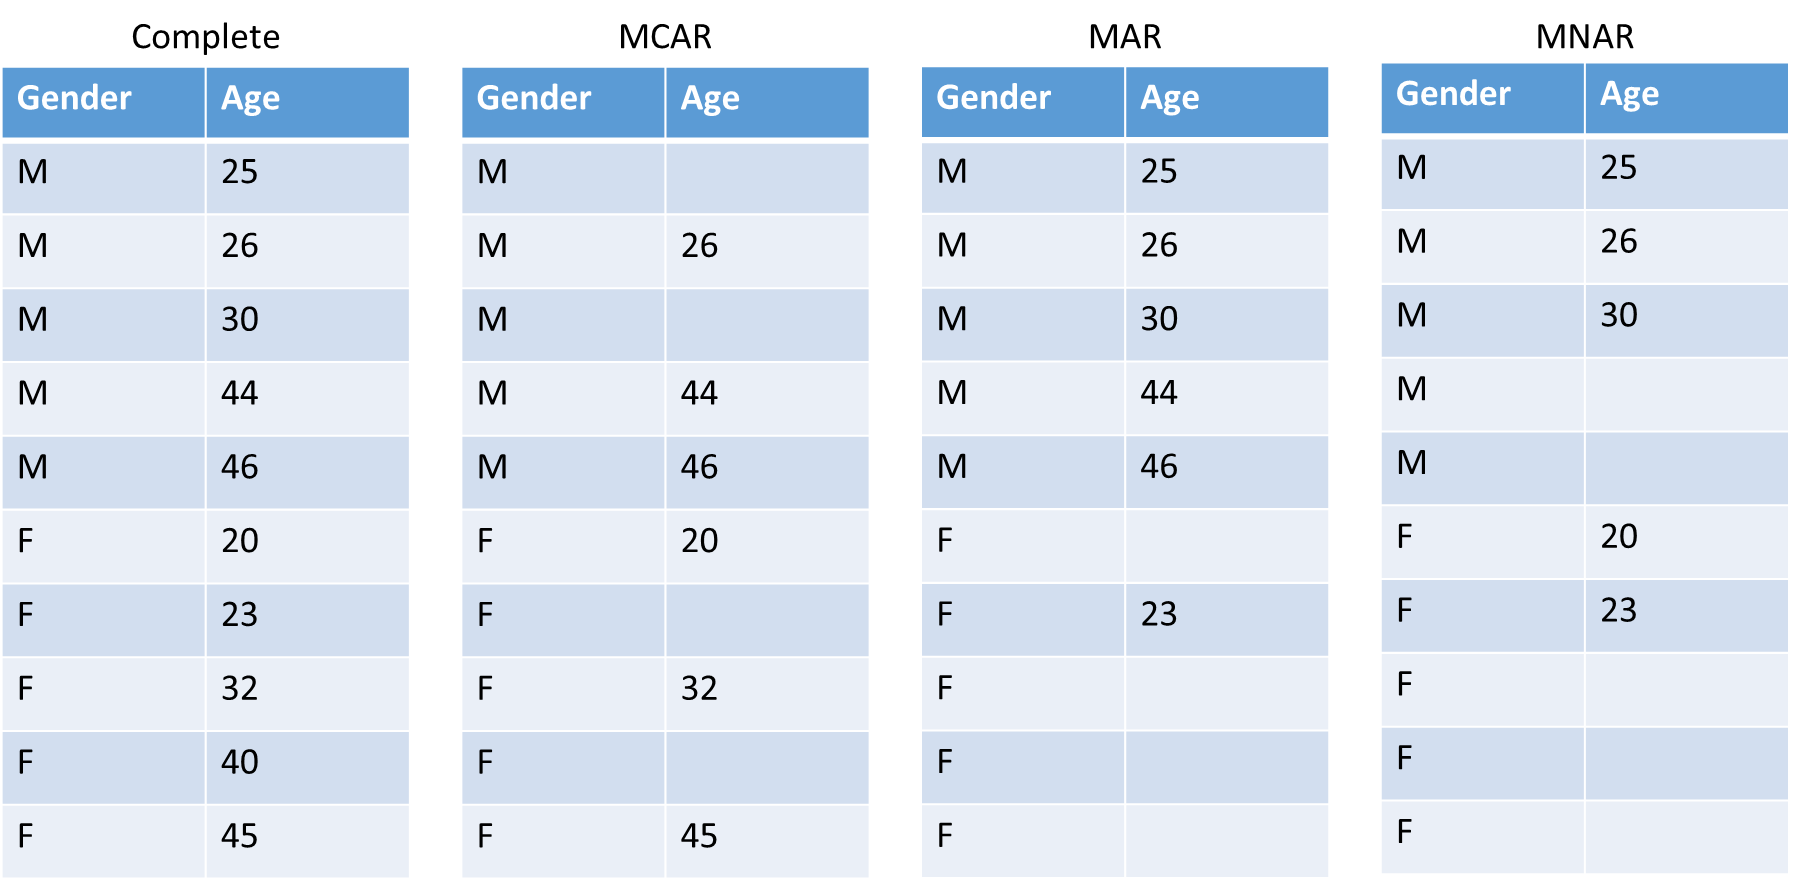

## Handeling the Missing Data

### Checking for Missing Data
To check if there is any missing data in a pandas DataFrame, you can use the **`isna()`** or **`isnull()`** function. These functions return a boolean mask indicating which values are missing.

Here is an example:

In [1]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, None, 4],
    'B': [None, 6, 7, 8],
    'C': [9, 10, 11, 12]
})

In [2]:
print(df.isna())

       A      B      C
0  False   True  False
1  False  False  False
2   True  False  False
3  False  False  False


In [3]:
print(df.isnull().sum())

A    1
B    1
C    0
dtype: int64


## Basics imputation methods

    - This technique is applied when Data is Missing Completely at Random(MCAR)
    - Means there is absolutely no relationship between the missing data and other values.

- **Import Required libraries**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

- **load Dataset**

In [5]:
data = pd.read_csv('titanic.csv')
df1 = data.copy()

In [6]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- **Check null values**

#### Here it shows only the NAN values, make sure you use `value_counts()` to further make sure

In [7]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that there is 177 null values in `Age`,687 in `Cabin` and 2 in `Embarked` feature.

- **plot the missing value using seaborn**

<AxesSubplot:>

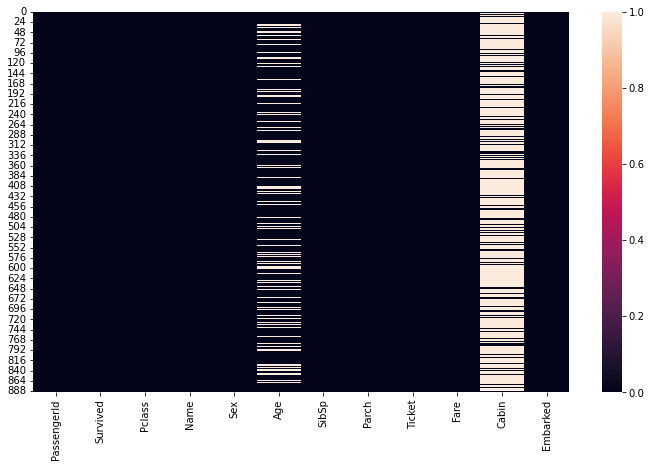

In [8]:
plt.figure(figsize=(12,7))
sns.heatmap(df1.isnull())

###  Handle Missing values by using Mean/Median/Mode imputation

- **1. Replace All NaN values in Age feature with mean**

In [9]:
# Method 1:
df1['Age'].fillna(df1['Age'].mean(),inplace=True) 

In [10]:
df1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Method 2:
df1.fillna({
    'Age':df1['Age'].mean()},
    inplace=True) 

- **Check null values after replace NAN with mean**

In [11]:
df1['Age'].isnull().sum()

0

#### Disadvantages
>1. As we can see in the above graph, Change or Distortion in the original variance
>2. Impacts Correlation

**Check the Standard deviation (STD):**
- If the Standard deviation (STD) become to much beggier or lower then do not use mean.

In [12]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [13]:
df1['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

---

### Now, Understand maybe there is some outlier are present in Age feature, at that time if we replace NaN with Mean then this feature not follow Gaussion Distribution.

    - So insted of Mean use Median and replace NaN with it

- **2. Replace All NaN values in Age feature with median**

In [14]:
df2 = data.copy()

In [15]:
# Method 1:
df2['Age'].fillna(df2['Age'].median(),inplace=True)

In [18]:
#Method 2 :
df2=df2.fillna({
    'Age':df2['Age'].median()
},inplace=True) 

In [16]:
df2['Age'].isnull().sum()

0

**Check the Standard deviation (STD):**
- If the Standard deviation (STD) become to much beggier or lower then do not use median

In [17]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [18]:
df2['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

---

### If there is some frequent value are present in feature then replace NaN values with that frequent value.
For example:
    In classs 12th most of student is 17 years old, suppose we have some entries with Missing Age then we assume Age of that student is also 17 years and replace NaN with 17 (we assume 17 is a frequent value)

- **3. Replace All NaN values in Age feature with mode**

In [19]:
df3 = data.copy()

In [20]:
# method 1:
df3['Age'].fillna( df3['Age'].mode()[0], inplace=True)

In [47]:
#method 2:
df3.fillna({
    'Age': df3['Age'].mode()[0]
}, inplace=True) 

In [21]:
df3['Age'].isnull().sum()

0

###  K-Nearest Neighbors (KNN) Imputation

K-Nearest Neighbors (KNN) imputation is a non-parametric imputation method that uses a distance metric to find the K nearest neighbors of each sample with missing values. The missing values are then imputed based on the average of the K nearest neighbors.

We can use the `KNNImputer` class from the `scikit-learn` library to perform KNN imputation. Here's an example of how to do KNN imputation in Python:

In [22]:
df4=data.copy()

In [23]:
df4.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
df4.drop(['Sex', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)

In [25]:
from sklearn.impute import KNNImputer

# Create an imputer object with KNN imputation strategy
imputer = KNNImputer(n_neighbors=5)

# Impute missing values in the DataFrame
df_imputed = pd.DataFrame(imputer.fit_transform(df4), 
                          columns=df4.columns)

In [26]:
df_imputed.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [27]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [28]:
df_imputed['Age'].describe()

count    891.000000
mean      29.694355
std       13.322660
min        0.420000
25%       21.700000
50%       29.000000
75%       36.450000
max       80.000000
Name: Age, dtype: float64

## Dropping Missing Values (DANGEROUS)

In [29]:
df5 = data.copy()

- **`any`** : If any NA values are present, drop that row or column.
- **`all`** : If all values are NA, drop that row or column.

In [30]:
df5.dropna(how='any',inplace=True)

In [31]:
df5['Age'].isnull().sum()

0

In [32]:
print('after dropping: ',df5.shape)

after dropping:  (183, 12)


In [33]:
print('before dropping: ', data.shape)

before dropping:  (891, 12)
